# Lista de exercícios sobre biblioteca TensorFlow

<br/>**Disciplina**: Introdução a Redes Neurais Profundas 2018/1
<br/>**Professor**: Jorge Leonid Aching Samatelo

**Aluno**: Marcos A. Spalenza

## Tabela de conteúdos
1. [Exercícios sobre CNNs](#ExerCNN)
1. [Bibliografia](#Bibio)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

## Exercícios sobre CNNs <a name="ExerCNN"></a>

## Exe. 1
Usando TensorFlow criar uma CNN com a estrutura detalhada na Figura abaixo . A CNN deve solucionar o problema de classificação do número MNIST, como foi feito no tutorial dos slides `003_TENSORFLOW_ANN_2x2.pdf` e `004_TENSORFLOW_CNN.pdf`.

Como pode é observado na Figura, temos:
* **Camada 0**. é a imagem de dígitos MNIST `28×28` em escala de cinza. 
* **Camada 1**. Camada convolucional com `32` filtros de tamanho `5×5`, com um `stride` de `1`, um `padding` de `2` e função de ativação `ReLU`. 
* **Camada 2**. Camada `Max-pooling` com filtro `2×2` com um `stride` de `2`. 
* **Camada 3**. Camada convolucional com `64` filtros de tamanho `5×5`, com um `stride` de `1`, um `padding` de `2` e função de ativação `ReLU`.
* **Camada 4**. Camada `Max-pooling` com filtro `2×2` com um `stride` de `2`.
* **Camada 5**. Camada totalmente conectada com `3164` (`=7×7×64`) neuronios com função de ativação `ReLU` para cada neuronio.
* **Camada 6**. Camada totalmente conectada com `1000` neuronios com função de ativação `Softmax` para cada neuronio.
* **Camada 7**. Camada totalmente conectada com `10` neuronios, para produzir as probabilidades relacionada ás 10 classes a serem preditas.

<img src=Exercicio1_CNN.png>

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


tf.reset_default_graph()

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

x = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

x_image = tf.reshape(x, [-1,28,28,1])
print("x_image=")
print(x_image)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
  
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])

b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])

b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")

h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
                                                             
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
              
finalRepresentations = []

finalWs = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(200):
        batch = mnist.train.next_batch(50)
        sess.run(train_step,feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        if i%10 == 0:
            train_accuracy = sess.run( accuracy, feed_dict={ x:batch[0], y_: batch[1], keep_prob: 1.0})
            print("step %d, training accuracy %g"%(i, train_accuracy))

    train_accuracy = sess.run( accuracy, feed_dict={ x:batch[0], y_: batch[1], keep_prob: 1.0})
    
    finalWs = y_conv.eval(session=sess, feed_dict={x:mnist.test.images, keep_prob:1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
    print("test accuracy %g"% sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
x_image=
Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)
step 0, training accuracy 0.12
step 10, training accuracy 0.3
step 20, training accuracy 0.5
step 30, training accuracy 0.58
step 40, training accuracy 0.68
step 50, training accuracy 0.84
step 60, training accuracy 0.64
step 70, training accuracy 0.78
step 80, training accuracy 0.84
step 90, training accuracy 0.92
step 100, training accuracy 0.8
step 110, training accuracy 0.9
step 120, training accuracy 0.9
step 130, training accuracy 0.9
step 140, training accuracy 0.88
step 150, training accuracy 0.94
step 160, training accuracy 0.84
step 170, training accuracy 0.9
step 180, training accuracy 0.94
step 190, training accuracy 0.88
step 199, training accuracy 0.94
test accuracy 0.9069


## Exe. 2
Tomando em conta o seguinte material 
https://www.analyticsvidhya.com/blog/2017/07/debugging-neural-network-with-tensorboard/

Use o tensorboard para:
* Imprimir o grafo que representa a  CNN em tensorflow.
* Graficar as distribuições dos pesos e os emviesamentos da CNN.


In [10]:
"""
Reference

https://github.com/mixuala/colab_utils
"""
    
import os
import requests
import shutil
import subprocess
import tensorflow as tf
import time

__all__ = ['install_ngrok', 'launch_tensorboard']

def __shell__(cmd, split=True):
    # get_ipython().system_raw(cmd)
    result = get_ipython().getoutput(cmd, split=split)
    if result and not split:
        result = result.strip('\n')
    return result  

def install_ngrok(bin_dir="/tmp"):
    """ 
    download and install ngrok on local vm instance
    Args:
    bin_dir: full path for the target directory for the `ngrok` binary
    """
    TARGET_DIR = bin_dir
    CWD = os.getcwd()
    is_grok_avail = os.path.isfile(os.path.join(TARGET_DIR,'ngrok'))
    if is_grok_avail:
        print("ngrok installed")
    else:
        import platform
        plat = platform.platform() # 'Linux-4.4.64+-x86_64-with-Ubuntu-17.10-artful'
        if 'x86_64' in plat:
            os.chdir('/tmp')
            print("calling wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip ..." )
            get_ipython().system_raw( "wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip" )
            print("calling unzip ngrok-stable-linux-amd64.zip ...")
            get_ipython().system_raw( "unzip ngrok-stable-linux-amd64.zip" )
            os.rename("ngrok", "{}/ngrok".format(TARGET_DIR))
            os.remove("ngrok-stable-linux-amd64.zip")
            is_grok_avail = os.path.isfile(os.path.join(TARGET_DIR,'ngrok'))
            os.chdir(TARGET_DIR)
            if is_grok_avail:
                print("ngrok installed. path={}".format(os.path.join(TARGET_DIR,'ngrok')))
            else:
                # ValueError: ERROR: ngrok not found, path=
                raise ValueError( "ERROR: ngrok not found, path=".format(TARGET_DIR) )
        else:
            raise NotImplementedError( "ERROR, ngrok install not configured for this platform, platform={}".format(plat))
        os.chdir(CWD)

def launch_tensorboard(bin_dir="/tmp", log_dir="/tmp", retval=False):
    install_ngrok(bin_dir)

    if not tf.gfile.Exists(log_dir):
        tf.gfile.MakeDirs(log_dir)

    ps = __shell__("ps -ax")
    is_tensorboard_running = len([f for f in ps if "tensorboard" in f ]) > 0
    is_ngrok_running = len([f for f in ps if "ngrok" in f ]) > 0
    print("status: tensorboard={}, ngrok={}".format(is_tensorboard_running, is_ngrok_running))

    if not is_tensorboard_running:
        get_ipython().system_raw('tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'.format(log_dir))
        is_tensorboard_running = True

    if not is_ngrok_running:
        get_ipython().system_raw('{}/ngrok http 6006 &'.format(bin_dir))
        is_ngrok_running = True

    
    time.sleep(3)
    retval = requests.get('http://localhost:4040/api/tunnels')
    tensorboard_url = retval.json()['tunnels'][0]['public_url'].strip()
    print("tensorboard url=", tensorboard_url)
    if retval:
        return tensorboard_url

ROOT = %pwd
LOG_DIR = os.path.join(ROOT, 'log')

launch_tensorboard( bin_dir=ROOT, log_dir=LOG_DIR)

with tf. Session() as sess:
    sess.run(tf.global_variables_initializer())
    summary_writer = tf.summary.FileWriter(LOG_DIR, graph=tf.get_default_graph())
    summary_writer.add_summary(sess.run(tf.summary.histogram("weights", W_fc2)))
    summary_writer.add_summary(sess.run(tf.summary.histogram("bias", b_fc2)))
    summary_writer.flush()

ngrok installed
status: tensorboard=True, ngrok=True
tensorboard url= http://fcb02136.ngrok.io


## Exe. 3
Tomando em conta o seguinte material
https://medium.com/@awjuliani/visualizing-deep-learning-with-t-sne-tutorial-and-video-e7c59ee4080c
* Use o algoritmo t-SNE para visualizar a como estão relacionados os pesos da ultima camada com as classes correspondentes.



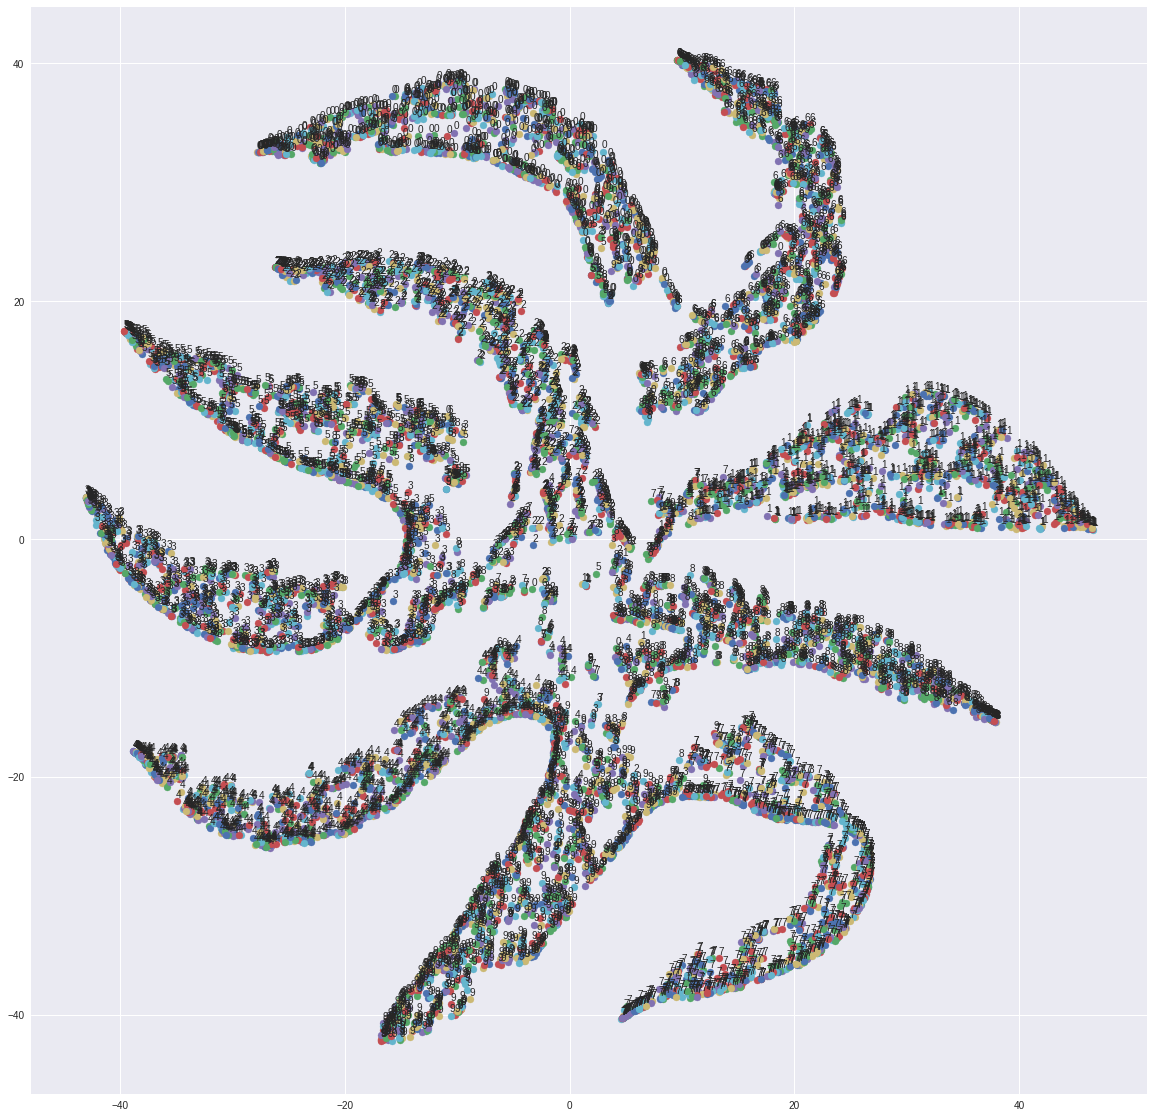

In [6]:
from sklearn.manifold import TSNE
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def plot_with_labels(lowDWeights, labels):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    plt.figure(figsize=(20, 20)) 
    for i, label in enumerate(labels):
        x, y = lowDWeights[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()

tsne = TSNE(perplexity=50, n_components=2, init='pca', n_iter=500)
lowDWeights = tsne.fit_transform(finalWs)
labels = np.argmax(mnist.test.labels,1)
plot_with_labels(lowDWeights, labels)

## Bibliografia <a name="Bibio"></a>

1. http://www.labri.fr/perso/nrougier/teaching/numpy.100/
2. https://www.tensorflow.org/get_started/mnist/pros 